In [1]:
# 引入套件
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

生成隨機資料

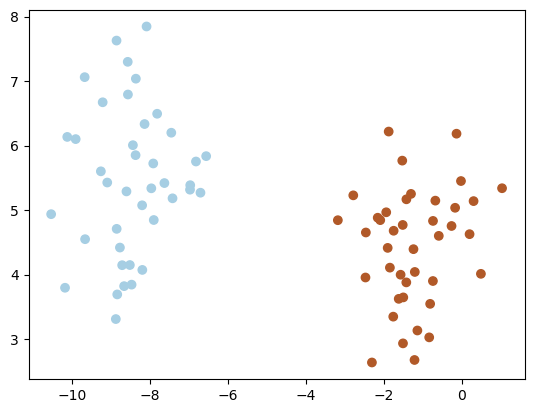

In [3]:
# 構造資料
X, y = make_blobs(n_samples=80, centers=2, random_state=7)
# 資料點分布圖
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

SVM學習

In [4]:
# 建構分類器
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

構造採樣格點

[[-10.53824902  -7.64665386  -4.7550587   -1.86346354   1.02813162]
 [-10.53824902  -7.64665386  -4.7550587   -1.86346354   1.02813162]
 [-10.53824902  -7.64665386  -4.7550587   -1.86346354   1.02813162]
 [-10.53824902  -7.64665386  -4.7550587   -1.86346354   1.02813162]
 [-10.53824902  -7.64665386  -4.7550587   -1.86346354   1.02813162]]
[[2.63687759 2.63687759 2.63687759 2.63687759 2.63687759]
 [3.93915092 3.93915092 3.93915092 3.93915092 3.93915092]
 [5.24142424 5.24142424 5.24142424 5.24142424 5.24142424]
 [6.54369757 6.54369757 6.54369757 6.54369757 6.54369757]
 [7.8459709  7.8459709  7.8459709  7.8459709  7.8459709 ]]


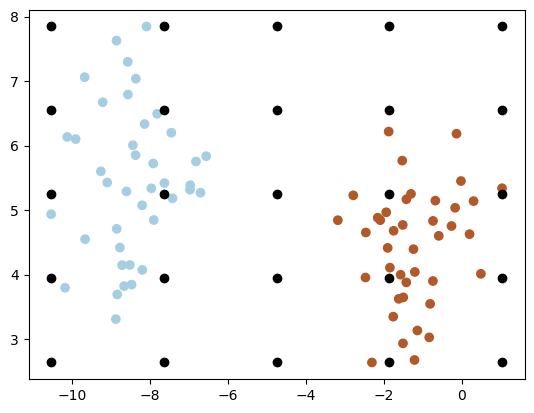

In [5]:
# 構造格點
sample_x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 5)
sample_y = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 5)
grid_x, grid_y = np.meshgrid(sample_x, sample_y)
print(grid_x)
print(grid_y)
# 散佈資料點
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# 散佈採樣點
plt.scatter(grid_x, grid_y, c='k')
plt.show()

決策函數

[[-10.53824902   2.63687759]
 [ -7.64665386   2.63687759]
 [ -4.7550587    2.63687759]
 [ -1.86346354   2.63687759]
 [  1.02813162   2.63687759]
 [-10.53824902   3.93915092]
 [ -7.64665386   3.93915092]
 [ -4.7550587    3.93915092]
 [ -1.86346354   3.93915092]
 [  1.02813162   3.93915092]
 [-10.53824902   5.24142424]
 [ -7.64665386   5.24142424]
 [ -4.7550587    5.24142424]
 [ -1.86346354   5.24142424]
 [  1.02813162   5.24142424]
 [-10.53824902   6.54369757]
 [ -7.64665386   6.54369757]
 [ -4.7550587    6.54369757]
 [ -1.86346354   6.54369757]
 [  1.02813162   6.54369757]
 [-10.53824902   7.8459709 ]
 [ -7.64665386   7.8459709 ]
 [ -4.7550587    7.8459709 ]
 [ -1.86346354   7.8459709 ]
 [  1.02813162   7.8459709 ]]


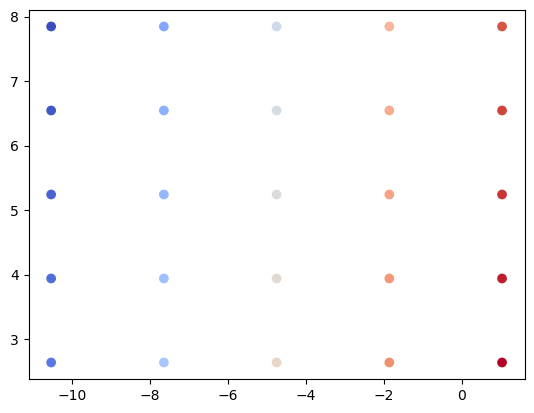

In [6]:
# 矩陣維度轉換
sample_xy = np.vstack([grid_x.ravel(), grid_y.ravel()]).T
print(sample_xy)
# 決策函數
z = clf.decision_function(sample_xy).reshape(grid_x.shape)
plt.scatter(grid_x, grid_y, c=z, cmap=plt.cm.coolwarm)
plt.show()

等高線圖

C:\Users\Admin\AppData\Local\Temp\ipykernel_26716\131621193.py:4: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(grid_x, grid_y, z, color='k',


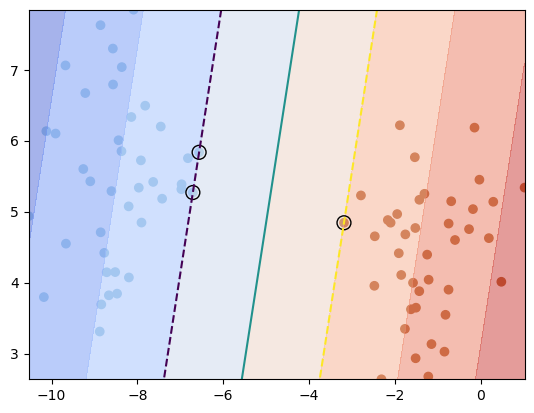

In [7]:
# 繪製資料點分布
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
# 繪製等高線
plt.contour(grid_x, grid_y, z, color='k', 
           levels=[-1, 0, 1], linestyles=['--', '-', '--'])
# 繪製漸層圖
plt.contourf(grid_x, grid_y, z, alpha=0.5, cmap=plt.cm.coolwarm)
# 支持向量點標示
plt.scatter(clf.support_vectors_[:, 0], 
            clf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k')
plt.show()

模型預測

[1 1 0]


C:\Users\Admin\AppData\Local\Temp\ipykernel_26716\2981380737.py:3: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(grid_x, grid_y, z, color='k',


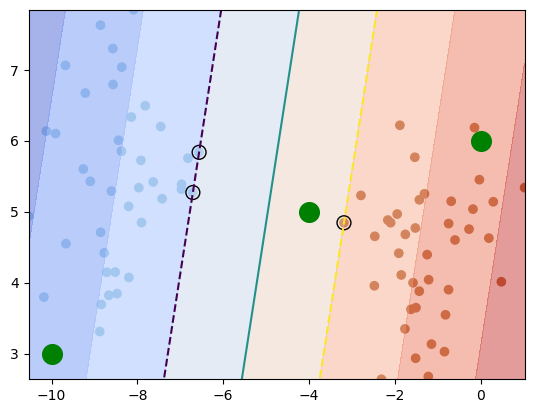

In [9]:
# 分類模型
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.contour(grid_x, grid_y, z, color='k', 
            levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.contourf(grid_x, grid_y, z, alpha=0.5, cmap=plt.cm.coolwarm)
plt.scatter(clf.support_vectors_[:, 0], 
            clf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k')
# 預測結果
test_points = np.array([
    [-4, 5], 
    [0, 6], 
    [-10, 3]
])
print(clf.predict(test_points))
plt.scatter(test_points[:, 0], test_points[:, 1], s=200, color='green')
plt.show()